# Nach dem Spiel ist vor dem Spiel

## Finales Ergebnis

Vortrag im Rahmen der Bits&Bytes Vorträge des RoboLab Freiberg 

Prof. Dr. Sebastian Zug - TU Bergakademie Freiberg

-------------------------------------

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SebastianZug/RoboLabVortraege/blob/main/19_Fussball/02_football_final.ipynb)

Dieses Tutorial basiert in Teilen auf dem Materialien und dem Demo-Kurs von Mart Jürisoo [Datensammlung auf Github](https://github.com/martj42/international_results).

> Wenn Ihnen fehlende Spiele auffallen, können Sie diese gerne ergänzen und einen Pull-Request erstellen.

In [39]:
rival = "Spain"

In [40]:
import pandas as pd

In [41]:
# Reading data file from Mart Jürisoo's github repository
df = pd.read_csv('https://raw.githubusercontent.com/martj42/international_results/master/results.csv')

## Datenvorbereitung

Später werden wir das Jahr eines Spieles nutzen, wir müssen es also extrahieren. Dazu wandeln wir zunächst das "Datum" in ein entsprechendes Datenformat um und können dann mit `.dt.year` darauf zurückgreifen.

In [43]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

Zudem löschen wir alle noch unvollständigen Einträge, die `NaN` enthalten. Offenbar hat Mart bereits einige Spiele festgehalten, diese aber noch nicht mit den Toren vervollständigt.

In [44]:
df.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
47378,2024-07-13,Canada,Uruguay,NaN,NaN,Copa América,Charlotte,United States,True,2024
47379,2024-07-14,Spain,England,NaN,NaN,UEFA Euro,Berlin,Germany,True,2024
47380,2024-07-14,Argentina,Colombia,NaN,NaN,Copa América,Miami Gardens,United States,True,2024


In [45]:
df = df.dropna(subset=['home_score', 'away_score'])

df.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
47375,2024-07-09,Argentina,Canada,2.0,0.0,Copa América,East Rutherford,United States,True,2024
47376,2024-07-10,Netherlands,England,1.0,2.0,UEFA Euro,Dortmund,Germany,True,2024
47377,2024-07-10,Uruguay,Colombia,0.0,1.0,Copa América,Charlotte,United States,True,2024


Nun können wir auch die Einträge der Tore in einen Ganzzahldatentyp umwandeln. Damit "verschwindet" die `.0` aus den Ergebnissen.

In [46]:
df["home_score"] = df["home_score"].astype(int)
df["away_score"] = df["away_score"].astype(int)

df.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
47375,2024-07-09,Argentina,Canada,2,0,Copa América,East Rutherford,United States,True,2024
47376,2024-07-10,Netherlands,England,1,2,UEFA Euro,Dortmund,Germany,True,2024
47377,2024-07-10,Uruguay,Colombia,0,1,Copa América,Charlotte,United States,True,2024


Die Austragungsorte, die in den Spalten `city`, `country` und `neutral` festgehalten sind, interessieren uns nicht. Wir löschen diese aus unserem Datensatz.

In [47]:
df = df.drop(columns=['city', 'country', 'neutral'], errors='ignore')
df.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,year
47375,2024-07-09,Argentina,Canada,2,0,Copa América,2024
47376,2024-07-10,Netherlands,England,1,2,UEFA Euro,2024
47377,2024-07-10,Uruguay,Colombia,0,1,Copa América,2024


## Datenfilterung

Wir wollen uns die Historie der Spiele der Deutschen Nationalmannschaft ansehen. Dazu filtern wir die Daten nach dem Land "Germany" und zwar bei Heim und Auswärtsspielen.

In [48]:
df_germany = df[(df['home_team'] == 'Germany') | (df['away_team'] == 'Germany')]
df_germany.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,year
47322,2024-06-23,Germany,Switzerland,1,1,UEFA Euro,2024
47349,2024-06-29,Germany,Denmark,2,0,UEFA Euro,2024
47367,2024-07-05,Germany,Spain,1,2,UEFA Euro,2024


Nun wollen wir uns aber auf ein anderes Land fokussieren. Nehmen wir an, dass dies der Gegner aus dem EM Achtefinale 2024 ist: Spanien.

In [49]:
df_focus  = df_germany[(df_germany['home_team'] == rival) | (df_germany['away_team'] == rival)].copy()

df_focus

,date,home_team,away_team,home_score,away_score,tournament,year
1947,1935-05-12,Germany,Spain,1,2,Friendly,1935
2028,1936-02-23,Spain,Germany,1,2,Friendly,1936
2600,1942-04-12,Germany,Spain,1,1,Friendly,1942
3651,1952-12-28,Spain,Germany,2,2,Friendly,1952
4578,1958-03-19,Germany,Spain,2,0,Friendly,1958
6684,1966-07-20,Germany,Spain,2,1,FIFA World Cup,1966
7939,1970-02-11,Spain,Germany,2,0,Friendly,1970
9540,1973-11-24,Germany,Spain,2,1,Friendly,1973
9605,1974-02-23,Spain,Germany,1,0,Friendly,1974
10476,1976-04-24,Spain,Germany,1,1,UEFA Euro qualification,1976


## Datenaufbereitung

Wir müssen zuordnen, welche Tore von welcher Mannschaft geschossen wurden. Dazu erstellen wir zwei neue Spalten, die die Tore der Heim- und Auswärtsmannschaften enthalten.

In [50]:
df_focus["german_goals"] = df_focus.apply(lambda row: row['home_score'] 
                                          if row['home_team'] == 'Germany' else row['away_score'], axis=1)
df_focus["rival_goals"]  = df_focus.apply(lambda row: row['home_score'] 
                                          if row['home_team'] == rival else row['away_score'], axis=1)

df_focus.head(3)

,date,home_team,away_team,home_score,away_score,tournament,year,german_goals,rival_goals
1947,1935-05-12,Germany,Spain,1,2,Friendly,1935,1,2
2028,1936-02-23,Spain,Germany,1,2,Friendly,1936,2,1
2600,1942-04-12,Germany,Spain,1,1,Friendly,1942,1,1


Um die Grafik zu erstellen, müssen wir die Ergebnisse gruppieren - wir fassen also alle 1:0 resultate unter dem Label `1:0` zusammen. Dieses Label wird in einer neuen Spalte `result_as_string` in unserer Tabelle gespeichert.

In [51]:
df_focus["result_as_string"] = df_focus["german_goals"].astype(str) + ":" + df_focus["rival_goals"].astype(str)
df_focus.head(3)

,date,home_team,away_team,home_score,away_score,tournament,year,german_goals,rival_goals,result_as_string
1947,1935-05-12,Germany,Spain,1,2,Friendly,1935,1,2,1:2
2028,1936-02-23,Spain,Germany,1,2,Friendly,1936,2,1,2:1
2600,1942-04-12,Germany,Spain,1,1,Friendly,1942,1,1,1:1


Ok, jetzt brauchen wir noch ein Ergebnis. Dazu werden die Tore miteinander verglichen.

In [52]:
# Sieg: 2, Unentschieden: 1, Niederlage: 0
df_focus['result']= df_focus.apply(lambda row: 2 if row['german_goals'] > row['rival_goals'] 
                                   else 1 if row['german_goals'] == row['rival_goals'] else 0, axis=1)

df_focus.head(3)

,date,home_team,away_team,home_score,away_score,tournament,year,german_goals,rival_goals,result_as_string,result
1947,1935-05-12,Germany,Spain,1,2,Friendly,1935,1,2,1:2,0
2028,1936-02-23,Spain,Germany,1,2,Friendly,1936,2,1,2:1,2
2600,1942-04-12,Germany,Spain,1,1,Friendly,1942,1,1,1:1,1


In [53]:
df_focus.result.value_counts()

result
0    9
2    9
1    9
Name: count, dtype: int64

## Visualisierung

In [54]:
result = df_focus.groupby(["result_as_string"]).agg(
                           {"result_as_string": "count",
                            "german_goals": "max",
                            "rival_goals": "max",
                            "year": "max"})

result = result.rename(columns={"result_as_string": "count"})

result 

,count,german_goals,rival_goals,year
result_as_string,,,,
0:0,1,0,0,1995
0:1,4,0,1,2010
0:2,1,0,2,1970
0:6,1,0,6,2020
1:0,1,1,0,2014
1:1,6,1,1,2022
1:2,2,1,2,2024
1:3,1,1,3,2003
2:0,3,2,0,1988


Für das Skalieren der Grafik brauchen wir noch eine maximale Toranzahl.

In [55]:
max_goal_count = int(df_focus[["german_goals", "rival_goals"]].max(axis=1).max(axis=0))
if max_goal_count < 6:
    max_goal_count = 6

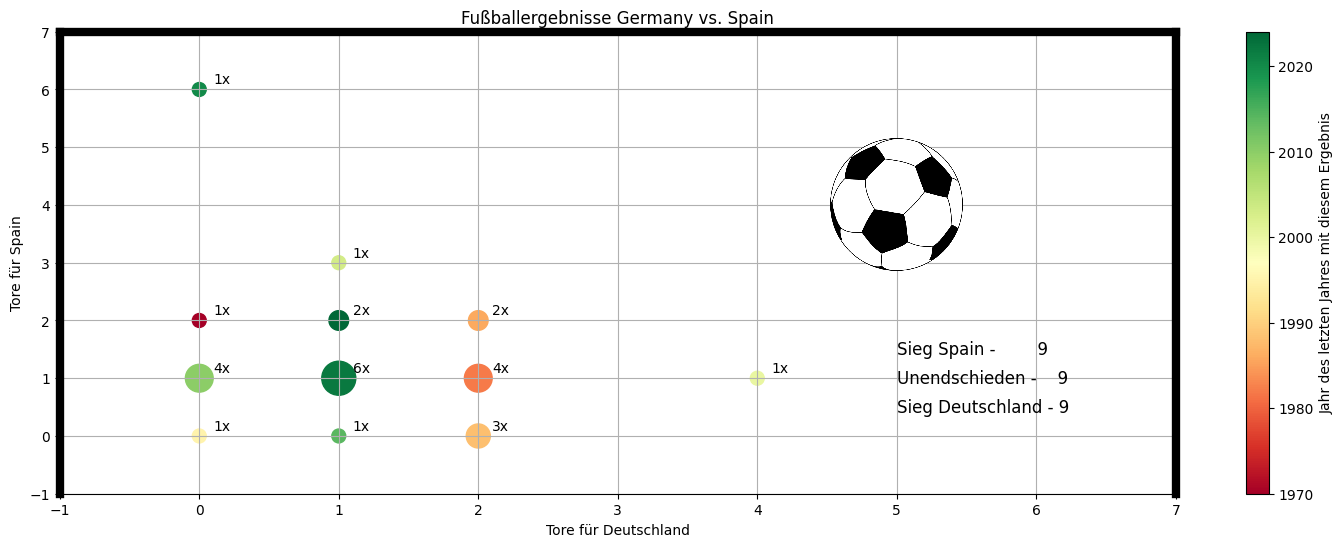

In [56]:
from matplotlib import pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
fig, ax = plt.subplots(figsize=(18, 6))

sc = ax.scatter(x=result['german_goals'], y=result['rival_goals'], 
                         s=result['count']*100, c=result['year'], cmap='RdYlGn')

ax.set_xlim(-1, max_goal_count+1)
ax.set_ylim(-1, max_goal_count+1)

football_image = plt.imread('./image/Soccerball.png')

# Function to create the image overlay
def add_image(ax, image, x, y, zoom=0.1):
    im = OffsetImage(image, zoom=zoom)
    ab = AnnotationBbox(im, (x, y), frameon=False, box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

add_image(ax, football_image, 5, 4, zoom=0.2)

for axis in ['top','left','right']:
    ax.spines[axis].set_linewidth(6)

ax.set_xlabel('Tore für Deutschland')
ax.set_ylabel(f'Tore für {rival}')
ax.set_title(f'Fußballergebnisse Germany vs. {rival}')
ax.grid(True)

cbar = plt.colorbar(sc)
cbar.set_label('Jahr des letzten Jahres mit diesem Ergebnis')

for index, row in result.iterrows():
    plt.annotate(f"{row['count']}x", (row['german_goals']+0.1, row['rival_goals']+0.1))

plt.annotate(f"Sieg {rival} -        {df_focus[df_focus.result==0].shape[0]}", (5, 1.5), 
             color='black', fontsize=12, ha='left', va='center')
plt.annotate(f"Unendschieden -    {df_focus[df_focus.result==1].shape[0]}", (5, 1), 
             color='black', fontsize=12, ha='left', va='center')
plt.annotate(f"Sieg Deutschland - {df_focus[df_focus.result==2].shape[0]}", (5, 0.5), 
             color='black', fontsize=12, ha='left', va='center')

plt.savefig('./image/football_results.png')